20180892 구본우

# 0. Import packages

In [33]:
import os

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# 1. Load Base Dataset

In [34]:
INPUT_DIR='./input/'
INPUT_DIR='./'

In [35]:
## Do not change this cell. 
## The reason for this is to prevent cheating using the original data from DACON. 
## If an assertion error occurs in that cell when TAs evaluate the submitted code of each student, it is considered cheating.

train = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))
park = pd.read_csv(os.path.join(INPUT_DIR, 'park.csv'))
dcc = pd.read_csv(os.path.join(INPUT_DIR, 'day_care_center.csv'))

assert train.shape[0] == 329690 and train.shape[1] == 13, 'Do not change the format of the input data.'
assert test.shape[0] == 85097 and test.shape[1] == 12, 'Do not change the format of the input data.'
assert park.shape[0] == 1359 and park.shape[1] == 7, 'Do not change the format of the input data.'
assert dcc.shape[0] == 7373 and dcc.shape[1] == 10, 'Do not change the format of the input data.'

In [36]:
print(train.shape, test.shape, park.shape, dcc.shape)

(329690, 13) (85097, 12) (1359, 7) (7373, 10)


# 2. Load additional dataset
- Explain here the additional dataset that you used.
- If you do not use any additional dataset, it's ok and keep empty the below cell.

# 3. EDA and Preprocessing
- Conduct exploratory data analysis and explain the insights from your analyses.
- Conduct data preprocessing, including feature engineering, and explain your insights that derive such techniques.

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
train.describe()

,index,apartment_id,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,PRICE
count,329690.000000,329690.000000,329690.000000,329690.000000,329690.000000,329690.000000,329601.000000,329601.000000,329690.000000,329690.000000,3.296900e+05
mean,164844.500000,2200.879177,113.374546,93.811417,1998.201474,9.649725,36.511732,127.899152,2020.380928,6.546344,4.236468e+05
std,95173.449462,1301.361025,67.664274,35.312279,9.099311,6.893568,1.180404,1.026130,1.308745,3.313855,3.276236e+05
min,0.000000,0.000000,0.000000,14.399720,1962.000000,-4.000000,35.058236,126.793126,2018.000000,1.000000,8.501200e+03
25%,82422.250000,1057.000000,56.000000,71.436483,1992.000000,4.000000,35.183442,127.012403,2019.000000,4.000000,2.185348e+05
50%,164844.500000,2188.000000,109.000000,99.697726,1999.000000,8.000000,37.486824,127.115032,2021.000000,7.000000,3.385540e+05
75%,247266.750000,3347.000000,171.000000,101.625662,2005.000000,13.000000,37.543500,129.065366,2021.000000,9.000000,5.185828e+05
max,329689.000000,4419.000000,236.000000,325.105962,2016.000000,70.000000,37.667270,129.202169,2022.000000,12.000000,7.073560e+06


In [39]:
test.describe()

,index,apartment_id,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month
count,85097.000000,85097.000000,85097.000000,85097.000000,85097.000000,85097.000000,85084.000000,85084.000000,85097.0,85097.000000
mean,372238.000000,2202.428770,111.969118,94.121187,1998.371564,9.646333,36.806906,127.644061,2023.0,5.889362
std,24565.532266,1301.522752,66.376688,34.614712,9.633915,6.725972,1.101825,0.952352,0.0,2.746825
min,329690.000000,0.000000,0.000000,14.399720,1962.000000,-3.000000,35.058236,126.793126,2023.0,1.000000
25%,350964.000000,1056.000000,57.000000,71.466382,1992.000000,4.000000,35.211669,126.963208,2023.0,4.000000
50%,372238.000000,2221.000000,109.000000,100.642559,1999.000000,9.000000,37.498920,127.076780,2023.0,6.000000
75%,393512.000000,3341.000000,170.000000,101.634393,2006.000000,13.000000,37.557356,129.005640,2023.0,8.000000
max,414786.000000,4419.000000,236.000000,316.100157,2016.000000,70.000000,37.667270,129.202169,2023.0,11.000000


In [40]:
nan = train[train.isnull().any(axis=1)]
nan

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,transaction_day,PRICE
10134,10134,136,busan,113,20.126239,2010,6,NaN,NaN,2020,1,1~10,60473.8
10135,10135,136,busan,113,23.993114,2010,3,NaN,NaN,2018,1,11~20,68510.8
10136,10136,136,busan,113,20.137242,2010,4,NaN,NaN,2018,11,11~20,65296.0
10137,10137,136,busan,113,23.993114,2010,4,NaN,NaN,2018,3,21~31,65296.0
10138,10138,136,busan,113,23.789317,2010,8,NaN,NaN,2021,7,21~31,76012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305887,305887,4141,busan,113,97.664543,2003,3,NaN,NaN,2020,10,1~10,250682.8
305888,305888,4141,busan,113,101.336233,2003,3,NaN,NaN,2020,9,21~30,247468.0
328164,328164,4410,busan,113,80.753245,2004,5,NaN,NaN,2021,9,11~20,213176.8
328165,328165,4410,busan,113,80.753245,2004,7,NaN,NaN,2021,11,1~10,204604.0


In [41]:
nan = test[test.isnull().any(axis=1)]
nan

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,transaction_day
2413,332103,136,busan,113,20.810106,2010,6,NaN,NaN,2023,1,21~31
2414,332104,136,busan,113,23.789317,2010,6,NaN,NaN,2023,1,21~31
2415,332105,136,busan,113,34.824119,2010,6,NaN,NaN,2023,2,11~20
2416,332106,136,busan,113,23.789317,2010,10,NaN,NaN,2023,2,11~20
2417,332107,136,busan,113,15.817446,2010,10,NaN,NaN,2023,3,1~10
2418,332108,136,busan,113,23.256863,2010,10,NaN,NaN,2023,3,1~10
2419,332109,136,busan,113,21.233487,2010,10,NaN,NaN,2023,3,1~10
2420,332110,136,busan,113,23.810247,2010,3,NaN,NaN,2023,3,21~31
2421,332111,136,busan,113,23.993114,2010,5,NaN,NaN,2023,4,1~10
33648,363338,1743,busan,113,90.201566,2015,7,NaN,NaN,2023,1,1~10


city = busan, dong = 113, 모두 lat, long 결측치 존재

데이터 분석 결과, 결측 데이터와 같은 Apt id 와 Dong을 가지는 다른 데이터 존재하지 않음, lat, long 결측치 매칭 불가

우선 City 데이터가 서울, 부산 두가지 뿐이고, 원본데이터로 모델을 생성하였을 경우 두 도시에 따른 Feature Importance가 너무 크게 나왔어서, train, test 데이터 모두 city를 기준으로 데이터를 나눠 두개의 piecewise 회귀모델을 학습 및 테스트를 시도해보았다

<AxesSubplot: xlabel='city', ylabel='count'>

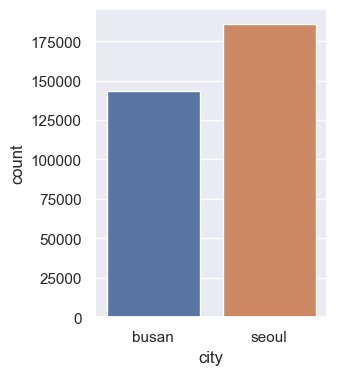

In [42]:
sns.set(rc={'figure.figsize':(3,4)})
sns.countplot(x='city', data=train,)

도시별로 데이터를 나누기전에 park, dcc와 전처리과정과 train,test와의 매핑을 진행한다

Creation of "gu" column in train and test file

In [43]:
mapping_dict = dict(zip(zip(park['city'], park['dong']), park['gu']))

train['gu'] = list(map(lambda x: mapping_dict.get(x), zip(train['city'], train['dong'])))
test['gu'] = list(map(lambda x: mapping_dict.get(x), zip(test['city'], test['dong'])))
train
test


,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,transaction_day,gu
0,329690,0,busan,197,101.647190,1993,3,35.149929,129.006071,2023,1,21~31,18
1,329691,0,busan,197,91.511175,1993,12,35.149929,129.006071,2023,2,1~10,18
2,329692,0,busan,197,125.865988,1993,2,35.149929,129.006071,2023,2,11~20,18
3,329693,0,busan,197,101.647190,1993,8,35.149929,129.006071,2023,2,21~28,18
4,329694,0,busan,197,101.647190,1993,13,35.149929,129.006071,2023,3,21~31,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85092,414782,4419,seoul,37,100.821957,2014,8,37.452039,127.070842,2023,10,21~31,22
85093,414783,4419,seoul,37,101.431912,2014,11,37.452039,127.070842,2023,10,21~31,22
85094,414784,4419,seoul,37,121.201627,2014,12,37.452039,127.070842,2023,11,1~10,22
85095,414785,4419,seoul,37,137.192013,2014,3,37.452039,127.070842,2023,11,21~30,22


Transaction year, month, day는 하나의 transaction date 로 "YYYYMM" 혹은 "YYYYMMDD"으로 실험을 해보았다

In [44]:
def date_preprocess(df):    
    day = df['transaction_day'].apply(lambda x: x.split('~')[-1]).astype(str)
    month = df['transaction_month'].apply(lambda x: str(x).zfill(2))
    df['transaction_date'] = df['transaction_year'].astype(str) + month
    df['transaction_date'] = df['transaction_date'].astype(int)
    df = df.drop(['transaction_year', 'transaction_month', 'transaction_day'], axis=1)
    return df

train = date_preprocess(train)
test = date_preprocess(test)
train.head()

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,PRICE,gu,transaction_date
0,0,0,busan,197,125.865988,1993,5,35.149929,129.006071,229250.8,18,202107
1,1,0,busan,197,101.647190,1993,12,35.149929,129.006071,215320.0,18,202110
2,2,0,busan,197,91.511175,1993,6,35.149929,129.006071,161740.0,18,202003
3,3,0,busan,197,101.647190,1993,13,35.149929,129.006071,199781.8,18,202005
4,4,0,busan,197,101.647190,1993,4,35.149929,129.006071,219606.4,18,202206


Preprocess park and dcc by extracting some features which seem important

DCC 전처리

city, gu 별로 특징적인 피쳐의 데이터 종류 갯수, 그리고 총 합 등을 이용해 매핑해보았다

In [45]:
check_null = dcc['CCTV_num'].isna().sum() / len(dcc['CCTV_num'])
check_null

0.30801573308015734

In [46]:
dcc['CCTV_num'] = dcc['CCTV_num'].fillna(0)
dcc['CCTV_num'].isna().sum()

0

In [47]:
dcc_grouped = dcc.groupby(['city', 'gu']).agg({"day_care_type": "count", "day_care_baby_num": "sum", 'CCTV_num':'sum', 'teacher_num':'sum' }).reset_index()
dcc_grouped = dcc_grouped.rename(columns={'day_care_type': 'num_day_care', 'day_care_baby_num': 'num_baby'})

dcc_grouped.head()

,city,gu,num_day_care,num_baby,CCTV_num,teacher_num
0,busan,3,123,5312,790.0,982.0
1,busan,7,106,5251,0.0,1059.0
2,busan,9,143,6676,909.0,1203.0
3,busan,12,39,2214,295.0,388.0
4,busan,14,124,6293,928.0,1130.0


In [48]:
park_grouped = park.groupby(['city','gu',"dong"]).agg({"park_type": "count", "park_area": "sum"}).reset_index()
park_grouped = park_grouped.rename(columns={"park_type": "num_park", "park_area": "total_park_area"})

park_grouped

,city,gu,dong,num_park,total_park_area
0,busan,3,41,1,110.507466
1,busan,3,52,1,25.416530
2,busan,3,78,25,1941.754346
3,busan,3,120,2,339.237872
4,busan,3,142,4,403.569523
...,...,...,...,...,...
239,seoul,33,211,1,62.506000
240,seoul,33,230,1,32.969683
241,seoul,34,73,2,1708.460754
242,seoul,34,81,2,44.195580


In [49]:
train = train.merge(dcc_grouped, on=['city',"gu"], how="left")
train = train.merge(park_grouped, on=['city',"dong", 'gu'], how="left")
train

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,PRICE,gu,transaction_date,num_day_care,num_baby,CCTV_num,teacher_num,num_park,total_park_area
0,0,0,busan,197,125.865988,1993,5,35.149929,129.006071,229250.80,18,202107,127,5371,523.0,960.0,7,244.075200
1,1,0,busan,197,101.647190,1993,12,35.149929,129.006071,215320.00,18,202110,127,5371,523.0,960.0,7,244.075200
2,2,0,busan,197,91.511175,1993,6,35.149929,129.006071,161740.00,18,202003,127,5371,523.0,960.0,7,244.075200
3,3,0,busan,197,101.647190,1993,13,35.149929,129.006071,199781.80,18,202005,127,5371,523.0,960.0,7,244.075200
4,4,0,busan,197,101.647190,1993,4,35.149929,129.006071,219606.40,18,202206,127,5371,523.0,960.0,7,244.075200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329685,329685,4419,seoul,37,101.431912,2014,4,37.452039,127.070842,885070.00,22,202205,204,10522,0.0,2228.0,5,172.214818
329686,329686,4419,seoul,37,101.431912,2014,14,37.452039,127.070842,826132.00,22,202110,204,10522,0.0,2228.0,5,172.214818
329687,329687,4419,seoul,37,71.687641,2014,2,37.452039,127.070842,697540.00,22,202211,204,10522,0.0,2228.0,5,172.214818
329688,329688,4419,seoul,37,137.192013,2014,18,37.452039,127.070842,870656.98,22,202009,204,10522,0.0,2228.0,5,172.214818


In [50]:
test = test.merge(dcc_grouped, on=['city',"gu"], how="left")
test = test.merge(park_grouped, on=['city',"dong", 'gu'], how="left")
test

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,gu,transaction_date,num_day_care,num_baby,CCTV_num,teacher_num,num_park,total_park_area
0,329690,0,busan,197,101.647190,1993,3,35.149929,129.006071,18,202301,127,5371,523.0,960.0,7,244.075200
1,329691,0,busan,197,91.511175,1993,12,35.149929,129.006071,18,202302,127,5371,523.0,960.0,7,244.075200
2,329692,0,busan,197,125.865988,1993,2,35.149929,129.006071,18,202302,127,5371,523.0,960.0,7,244.075200
3,329693,0,busan,197,101.647190,1993,8,35.149929,129.006071,18,202302,127,5371,523.0,960.0,7,244.075200
4,329694,0,busan,197,101.647190,1993,13,35.149929,129.006071,18,202303,127,5371,523.0,960.0,7,244.075200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85092,414782,4419,seoul,37,100.821957,2014,8,37.452039,127.070842,22,202310,204,10522,0.0,2228.0,5,172.214818
85093,414783,4419,seoul,37,101.431912,2014,11,37.452039,127.070842,22,202310,204,10522,0.0,2228.0,5,172.214818
85094,414784,4419,seoul,37,121.201627,2014,12,37.452039,127.070842,22,202311,204,10522,0.0,2228.0,5,172.214818
85095,414785,4419,seoul,37,137.192013,2014,3,37.452039,127.070842,22,202311,204,10522,0.0,2228.0,5,172.214818


'object' dtype 인 City를 numeric dtype으로 변환해준다

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_cols = ['city']

for col in le_cols:
    le.fit(train[col])
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

train.head()

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,PRICE,gu,transaction_date,num_day_care,num_baby,CCTV_num,teacher_num,num_park,total_park_area
0,0,0,0,197,125.865988,1993,5,35.149929,129.006071,229250.8,18,202107,127,5371,523.0,960.0,7,244.0752
1,1,0,0,197,101.647190,1993,12,35.149929,129.006071,215320.0,18,202110,127,5371,523.0,960.0,7,244.0752
2,2,0,0,197,91.511175,1993,6,35.149929,129.006071,161740.0,18,202003,127,5371,523.0,960.0,7,244.0752
3,3,0,0,197,101.647190,1993,13,35.149929,129.006071,199781.8,18,202005,127,5371,523.0,960.0,7,244.0752
4,4,0,0,197,101.647190,1993,4,35.149929,129.006071,219606.4,18,202206,127,5371,523.0,960.0,7,244.0752


City 별 데이터 가르기

In [52]:
busan_train = train.groupby('city').get_group(0)
seoul_train = train.groupby('city').get_group(1)

busan_test = test.groupby('city').get_group(0)
seoul_test = test.groupby('city').get_group(1)

In [53]:
seoul_train['lat'].describe()

count    186003.000000
mean         37.547775
std           0.059370
min          37.445050
25%          37.498816
50%          37.541760
75%          37.581780
max          37.667270
Name: lat, dtype: float64

In [54]:
seoul_train['long'].describe()

count    186003.000000
mean        127.000450
std           0.094125
min         126.793126
25%         126.922778
50%         127.025754
75%         127.076780
max         127.171300
Name: long, dtype: float64

In [55]:
busan_train['lat'].describe()

count    143598.000000
mean         35.169743
std           0.047950
min          35.058236
25%          35.138767
50%          35.175185
75%          35.204441
max          35.283240
Name: lat, dtype: float64

In [56]:
busan_train['long'].describe()

count    143598.000000
mean        129.063244
std           0.063698
min         128.828341
25%         129.010709
50%         129.071295
75%         129.112653
max         129.202169
Name: long, dtype: float64

In [57]:
lat_most_common_value = busan_train['lat'].value_counts().idxmax()
long_most_common_value = busan_train['long'].value_counts().idxmax()
print(lat_most_common_value, long_most_common_value)

35.1781799 129.1759973


In [58]:
# Mode
# busan_train.fillna(value= {'lat':35.1781799, 'long':129.1759973}, inplace=True)
# busan_test.fillna(value= {'lat':35.1781799, 'long':129.1759973}, inplace=True)

lat, long 결측치를 데이터의 평균 값으로 채웠다

In [59]:
# Mean
busan_train.fillna(value= {'lat':35.169743, 'long':129.063244}, inplace=True)
busan_test.fillna(value= {'lat':35.169743, 'long':129.063244}, inplace=True)

In [60]:
train.fillna(value= {'lat':35.169743, 'long':129.063244}, inplace=True)
test.fillna(value= {'lat':35.169743, 'long':129.063244}, inplace=True)

In [61]:
busan_test.loc[2413:2500]

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,gu,transaction_date,num_day_care,num_baby,CCTV_num,teacher_num,num_park,total_park_area
2413,332103,136,0,113,20.810106,2010,6,35.169743,129.063244,20,202301,40,1998,274.0,384.0,1,453.817364
2414,332104,136,0,113,23.789317,2010,6,35.169743,129.063244,20,202301,40,1998,274.0,384.0,1,453.817364
2415,332105,136,0,113,34.824119,2010,6,35.169743,129.063244,20,202302,40,1998,274.0,384.0,1,453.817364
2416,332106,136,0,113,23.789317,2010,10,35.169743,129.063244,20,202302,40,1998,274.0,384.0,1,453.817364
2417,332107,136,0,113,15.817446,2010,10,35.169743,129.063244,20,202303,40,1998,274.0,384.0,1,453.817364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,332186,143,0,62,141.252399,1995,6,35.075131,129.072895,28,202310,49,2748,0.0,485.0,14,1636.879078
2497,332187,143,0,62,102.699661,1995,6,35.075131,129.072895,28,202310,49,2748,0.0,485.0,14,1636.879078
2498,332188,143,0,62,102.699661,1995,8,35.075131,129.072895,28,202311,49,2748,0.0,485.0,14,1636.879078
2499,332189,143,0,62,102.699661,1995,7,35.075131,129.072895,28,202311,49,2748,0.0,485.0,14,1636.879078


결측치가 정상적으로 채워짐

In [62]:
busan_train.isnull().any().any(),busan_test.isnull().any().any(),seoul_train.isnull().any().any(),seoul_test.isnull().any().any()

(False, False, False, False)

Variables of Correlation

Busan Feature Correlation

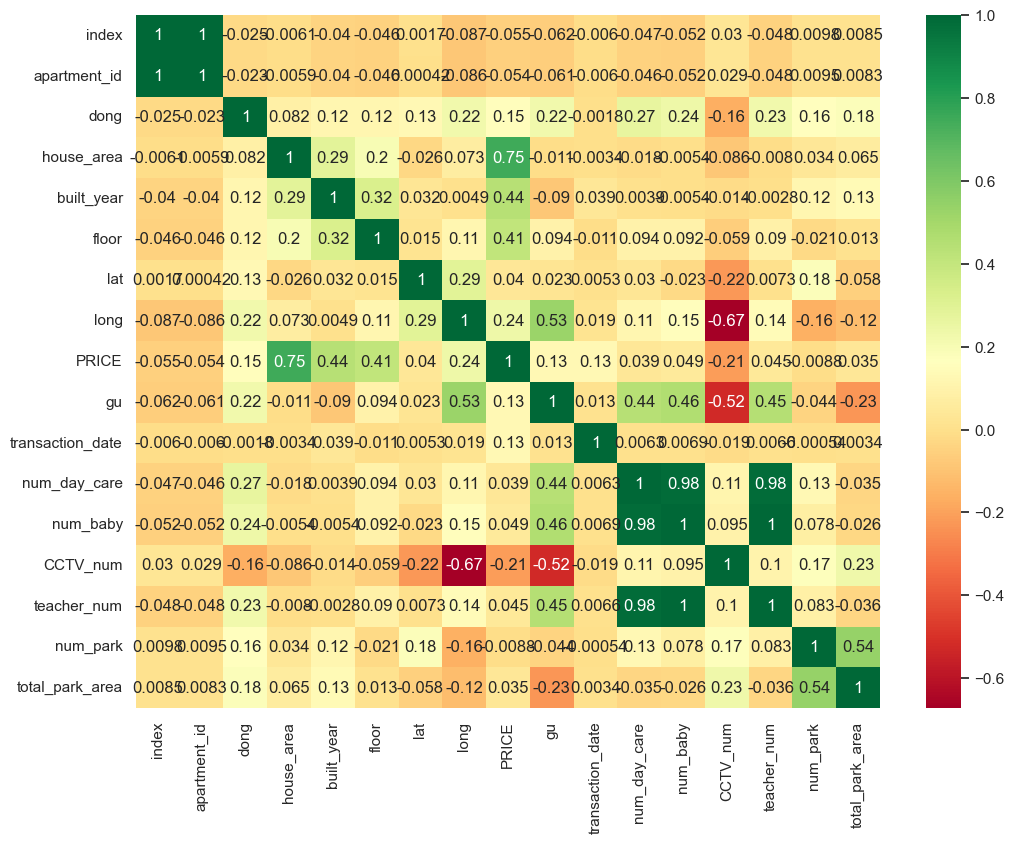

In [63]:
corrmat = busan_train.corr()
busan_top_corr_features = corrmat.index[abs(corrmat["PRICE"])>=0.0]
busan_top_corr_features
plt.figure(figsize=(12,9))
g = sns.heatmap(busan_train[busan_top_corr_features].corr(),annot=True,cmap="RdYlGn")

Seoul Feature Correlation

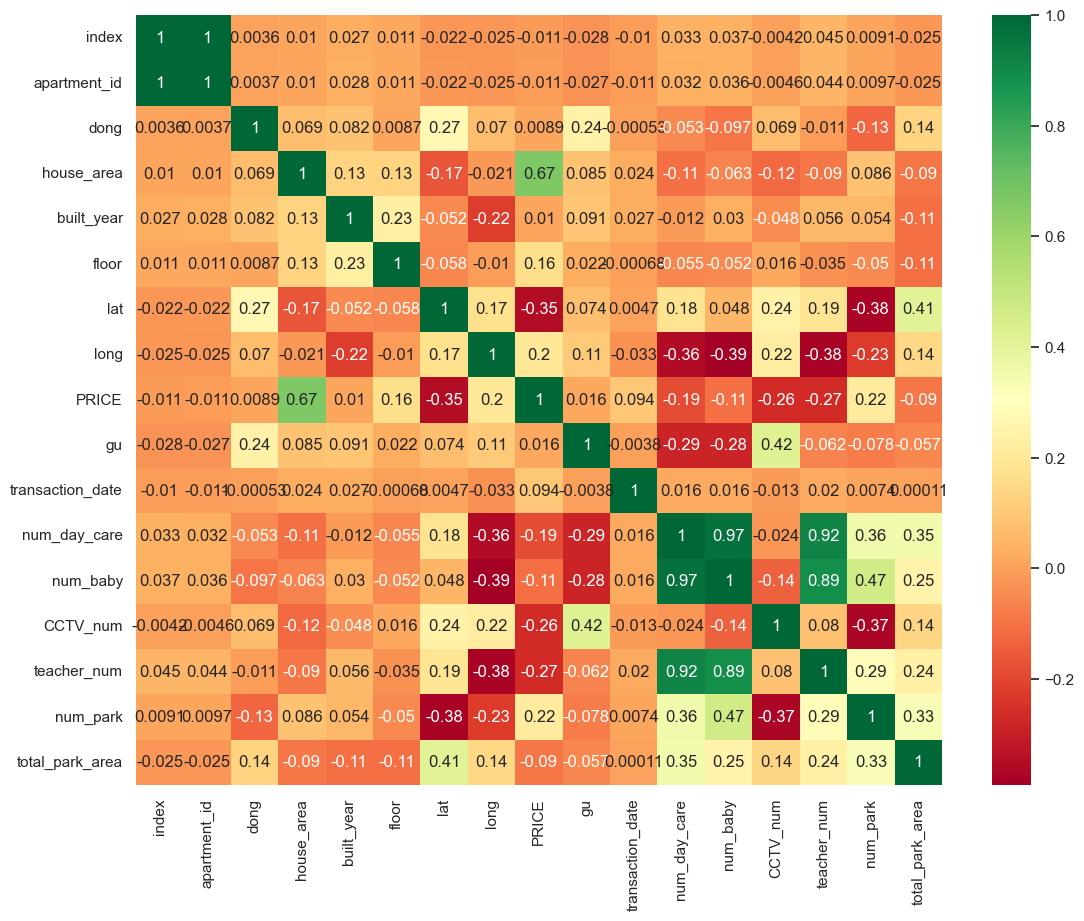

In [64]:
corrmat = seoul_train.corr()
seoul_top_corr_features = corrmat.index[abs(corrmat["PRICE"])>=0.0]
seoul_top_corr_features
plt.figure(figsize=(13,10))
g = sns.heatmap(seoul_train[seoul_top_corr_features].corr(),annot=True,cmap="RdYlGn")

Normality 확인

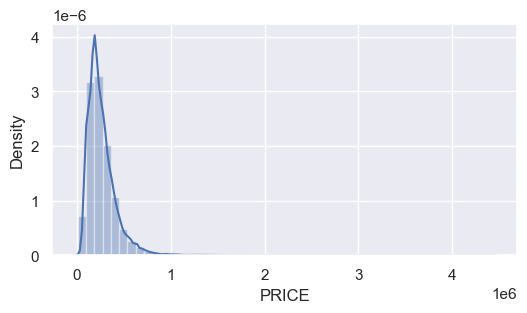

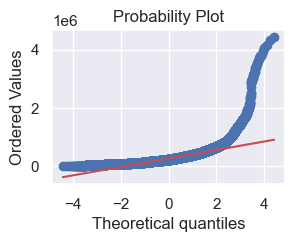

In [31]:
from scipy import stats
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(busan_train['PRICE'])
fig = plt.figure(figsize=(3,2))
res = stats.probplot(busan_train['PRICE'], plot=plt)

In [32]:
busan_train['PRICE'] = np.log1p(busan_train['PRICE'])

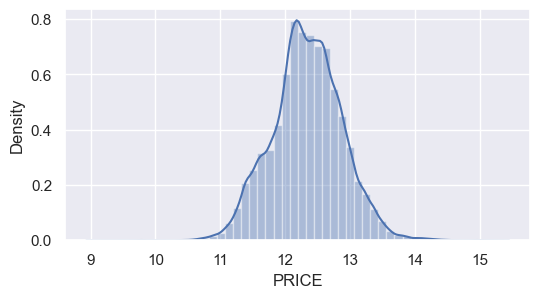

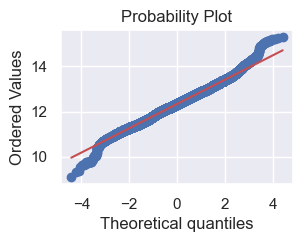

In [33]:
sns.distplot(busan_train['PRICE'])
fig = plt.figure(figsize=(3,2))
res = stats.probplot(busan_train['PRICE'], plot=plt)

log price를 적용하니 데이터가 정규성을 따른다

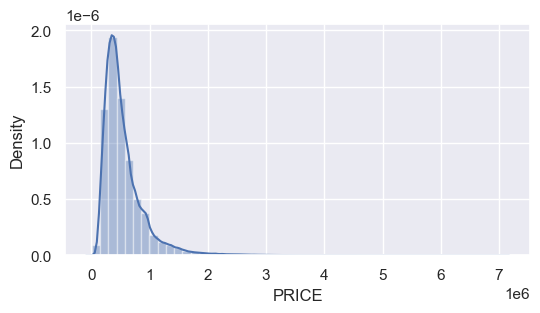

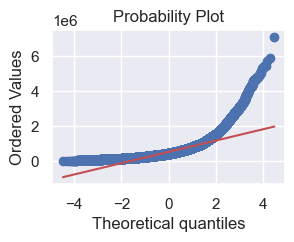

In [34]:
sns.distplot(seoul_train['PRICE'])
fig = plt.figure(figsize=(3,2))
res = stats.probplot(seoul_train['PRICE'], plot=plt)

In [35]:
seoul_train['PRICE'] = np.log1p(seoul_train['PRICE'])

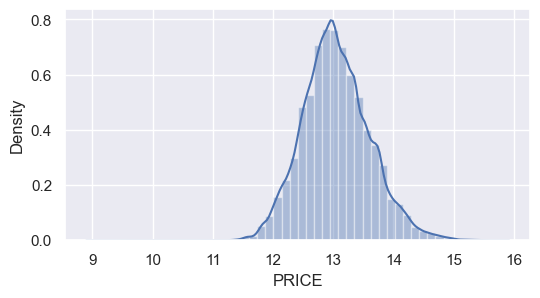

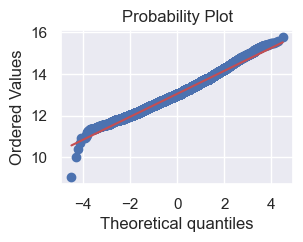

In [36]:
sns.distplot(seoul_train['PRICE'])
fig = plt.figure(figsize=(3,2))
res = stats.probplot(seoul_train['PRICE'], plot=plt)

랜덤한 Kfold Split 보다 Validation set에 모든 아파트 별로 데이터가 하나 이상 들어가는 구성도 모델 학습에 효과적일 것 같아 일반적인 Kfold 방식과 비교해보았다

K fold validation set made including each proportion of apartment_id

In [37]:
import pandas as pd
import numpy as np

def split_data_by_id(data, split_ratio=0.3, num_validation_sets=20):
    # get unique apartment IDs
    apartment_ids = data['apartment_id'].unique()

    train_fold = []
    val_fold = []

    for i in range(num_validation_sets):
        # initialize empty lists for train and validation sets
        train_set = []
        validation_set = []

        # split data into train and validation sets for each apartment ID
        for apartment_id in apartment_ids:
            # select rows where apartment ID matches current ID
            apartment_data = data[data['apartment_id'] == apartment_id]

            # shuffle apartment data
            apartment_data = apartment_data.sample(frac=1, random_state=i+1)

            # calculate number of rows for train and validation sets
            num_rows = len(apartment_data)
            num_train = int(num_rows * (1 - split_ratio))

            # split data into train and validation sets
            apartment_train = apartment_data.head(num_train)
            apartment_validations = apartment_data.tail(num_rows-num_train)

            # append apartment train and validation sets to overall sets
            train_set.append(apartment_train)
            validation_set.append(apartment_validations)

        # concatenate train and validation sets into final DataFrames
        train_df = pd.concat(train_set)
        validation_df = pd.concat(validation_set)

        train_fold.append(train_df)
        val_fold.append(validation_df)

    return train_fold, val_fold


In [38]:
seoul_train_dfs , seoul_val_dfs = split_data_by_id(seoul_train, split_ratio=0.3,num_validation_sets=10)
busan_train_dfs , busan_val_dfs = split_data_by_id(busan_train, split_ratio=0.3,num_validation_sets=10)

# 4. Modeling

In [45]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


def run_model(model, train_cols, train, val, test):
    feature_importance = []
    val_accs = []
    test_pred = []

    for idx in range(len(train)):

        tr_x, tr_y = train[idx][train_cols], train[idx]['PRICE']
        val_x, val_y = val[idx][train_cols], val[idx]['PRICE']
        test_x = test[train_cols]
        
        model.fit(tr_x, tr_y, early_stopping_rounds=20, eval_set = [(val_x, val_y)], verbose=False)  
        # model.fit(tr_x, tr_y)  
        pred_val = model.predict(val_x)
        rf_acc = mean_absolute_error(val_y, pred_val)
        val_accs.append(rf_acc)
        feature_importance.append(model.feature_importances_)
        test_price = model.predict(test_x)
        test_price = np.expm1(model.predict(test_x))
        test_pred.append(test_price)
        print(f'Fold{idx}: MAE {rf_acc:.4f}')
    
    print(f'Model Average MAE {np.mean(val_accs):.4f}')
    print("==================================================")
    plt.figure(figsize=(12,6))
    plt.bar(x=train_cols, height=np.mean(feature_importance, axis=0))
    plt.xticks(fontsize=15, rotation=45)
    plt.show()
    
    min_idx = np.argmin(val_accs)
    pred_test = np.mean(test_pred, axis=0)
    # pred_test = test_pred[min_idx]
    result_df = pd.DataFrame({'index':test['index'].values, 'PRICE':pred_test})

    return result_df, np.mean(val_accs)

Model Execution

```Best Result```

```실험 결과 제가 구현한 City 별 두가지의 XGBoost 모델을 만드는 방식과 Validation Set 구성도 Apt 별로 일정한 비율이 포함되게 학습을 한 방식이 높은 예측 성능을 보였지만```

```결국 더 적은 MAE를 보인 Best Model은 하나의 XGBoost Regressor의 모델로 일반적인 KFold을 이용해서 학습시킨 결과가 Best Result로 나왔습니다. ```

In [46]:
train['PRICE'] = np.log1p(train['PRICE'])

In [47]:
train.head()

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,PRICE,gu,transaction_date,num_day_care,num_baby,CCTV_num,teacher_num,num_park,total_park_area
0,0,0,0,197,125.865988,1993,5,35.149929,129.006071,12.342576,18,202107,127,5371,523.0,960.0,7,244.0752
1,1,0,0,197,101.647190,1993,12,35.149929,129.006071,12.279885,18,202110,127,5371,523.0,960.0,7,244.0752
2,2,0,0,197,91.511175,1993,6,35.149929,129.006071,11.993752,18,202003,127,5371,523.0,960.0,7,244.0752
3,3,0,0,197,101.647190,1993,13,35.149929,129.006071,12.204986,18,202005,127,5371,523.0,960.0,7,244.0752
4,4,0,0,197,101.647190,1993,4,35.149929,129.006071,12.299597,18,202206,127,5371,523.0,960.0,7,244.0752


In [48]:
test.head()

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,gu,transaction_date,num_day_care,num_baby,CCTV_num,teacher_num,num_park,total_park_area
0,329690,0,0,197,101.647190,1993,3,35.149929,129.006071,18,202301,127,5371,523.0,960.0,7,244.0752
1,329691,0,0,197,91.511175,1993,12,35.149929,129.006071,18,202302,127,5371,523.0,960.0,7,244.0752
2,329692,0,0,197,125.865988,1993,2,35.149929,129.006071,18,202302,127,5371,523.0,960.0,7,244.0752
3,329693,0,0,197,101.647190,1993,8,35.149929,129.006071,18,202302,127,5371,523.0,960.0,7,244.0752
4,329694,0,0,197,101.647190,1993,13,35.149929,129.006071,18,202303,127,5371,523.0,960.0,7,244.0752


In [50]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
train_dfs = []
val_dfs = []  
for train_idx, val_idx in kf.split(train):
    train_dfs.append(train.iloc[train_idx])
    val_dfs.append(train.iloc[val_idx])

Fold0: MAE 0.0416
Fold1: MAE 0.0421
Fold2: MAE 0.0407
Fold3: MAE 0.0415
Fold4: MAE 0.0421
Fold5: MAE 0.0417
Fold6: MAE 0.0408
Fold7: MAE 0.0419
Fold8: MAE 0.0411
Fold9: MAE 0.0430
Model Average MAE 0.0416


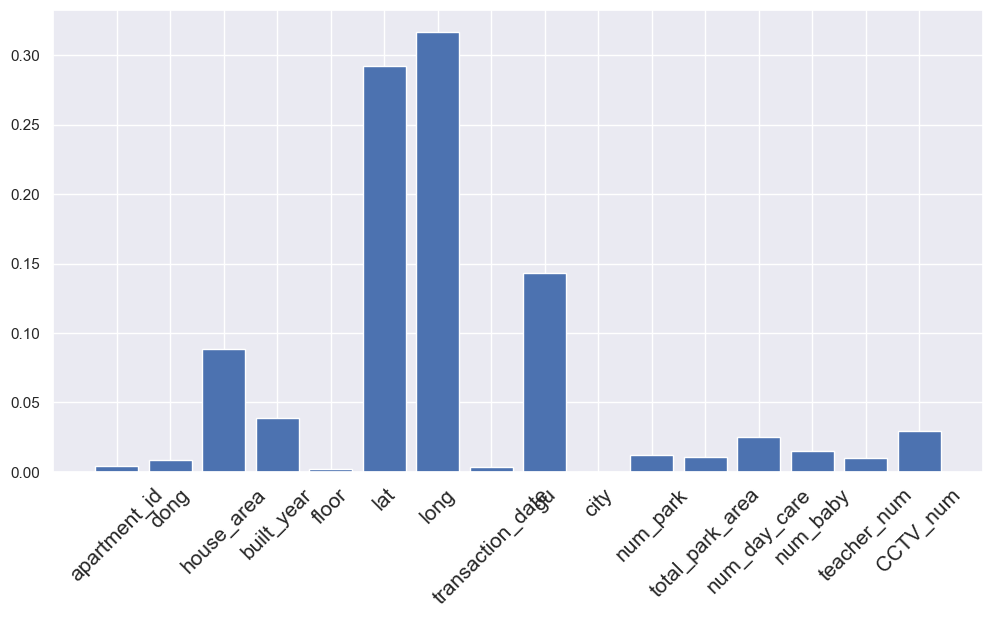

In [726]:
train_cols = ['apartment_id', 'dong', 'house_area', 'built_year', 
              'floor', 'lat', 'long', 'transaction_date', 'gu', 'city',
              'num_park', 'total_park_area', 'num_day_care', 'num_baby', 'teacher_num', 'CCTV_num']
model = XGBRegressor(n_estimators=5000, 
                     n_jobs=-1,
                     )
result_df, mean_score = run_model(model, train_cols, train_dfs, val_dfs, test)
result_df.to_csv('20230531_13_one_model_full_feat_xgb_10fold.csv', index=False)

# 5. Make submission

In [ ]:
result_df, mean_score = run_model(model, train_cols, train_dfs, val_dfs, test)
result_df.to_csv('20230531_13_one_model_full_feat_xgb_10fold.csv', index=False)

# 6. Appendix

```Best Result``` from piecewise boosting model by city

Fold0: MAE 0.0351
Fold1: MAE 0.0347
Fold2: MAE 0.0354
Fold3: MAE 0.0368
Fold4: MAE 0.0356
Fold5: MAE 0.0360
Fold6: MAE 0.0349
Fold7: MAE 0.0349
Fold8: MAE 0.0370
Fold9: MAE 0.0370
Model Average MAE 0.0357


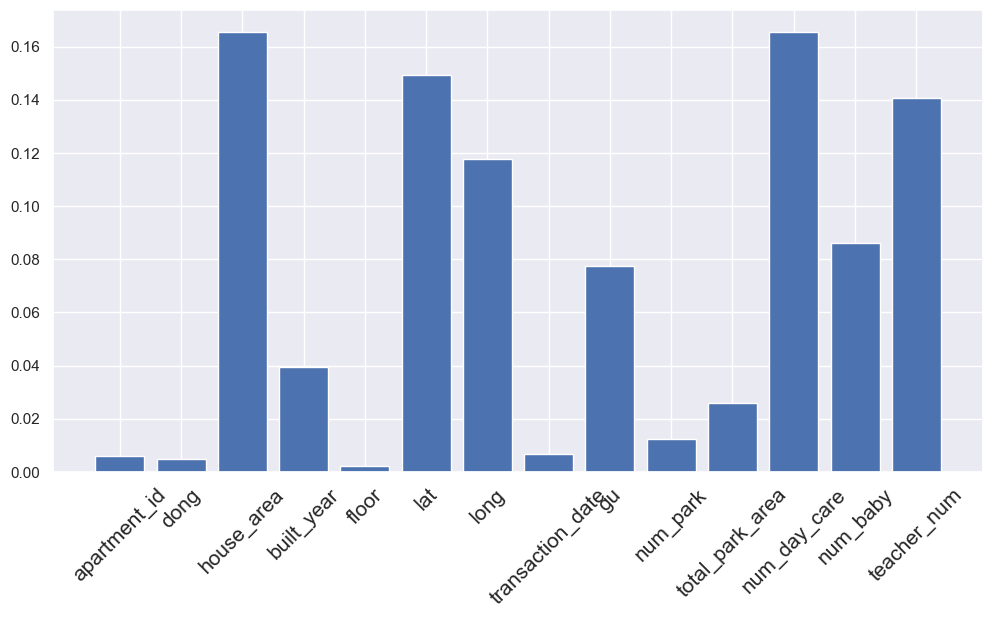

In [63]:
seoul_train_cols = ['apartment_id', 'dong', 'house_area', 'built_year', 
              'floor', 'lat', 'long', 'transaction_date', 
              'gu', 'num_park', 'total_park_area', 'num_day_care', 'num_baby', 'teacher_num']
model = XGBRegressor(n_estimators=5000, 
                     n_jobs=-1,
                     max_depth = 7,
                     reg_lambda = 0.1,
                     reg_alpha = 0.4,
                     colsample_bytree = 0.6)
seoul_result_df, seoul_mean_score = run_model(model, seoul_train_cols, seoul_train_dfs, seoul_val_dfs, seoul_test)

Fold0: MAE 0.0492
Fold1: MAE 0.0486
Fold2: MAE 0.0486
Fold3: MAE 0.0486
Fold4: MAE 0.0465
Fold5: MAE 0.0482
Fold6: MAE 0.0481
Fold7: MAE 0.0481
Fold8: MAE 0.0481
Fold9: MAE 0.0486
Model Average MAE 0.0483


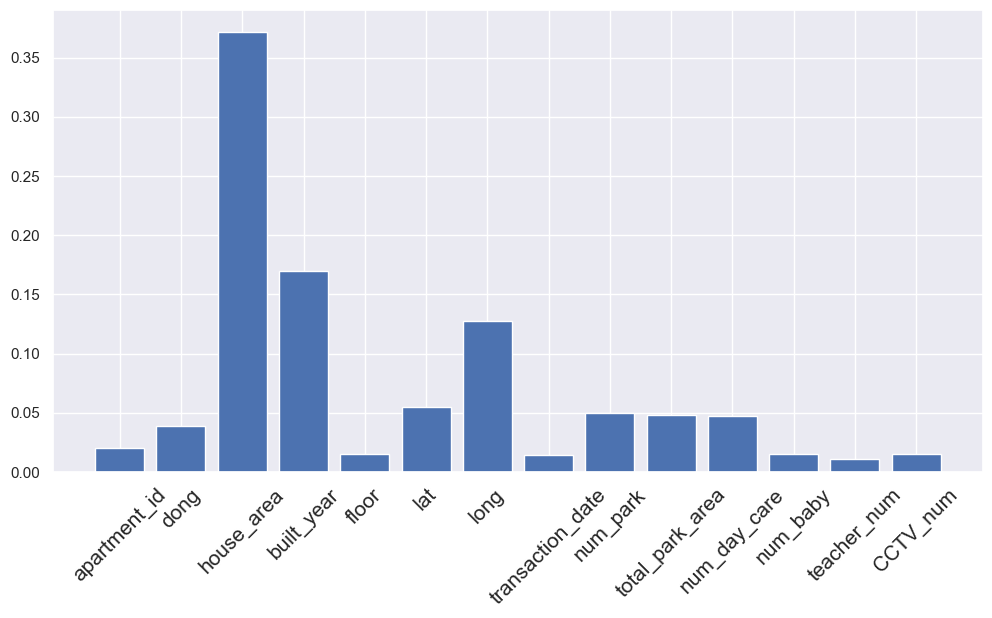

In [100]:
busan_train_cols = ['apartment_id', 'dong', 'house_area', 'built_year', 
              'floor', 'lat', 'long', 'transaction_date', 
              'num_park', 'total_park_area', 'num_day_care', 'num_baby', 'teacher_num', 'CCTV_num']

model = XGBRegressor(max_depth=5, 
                     n_estimators=3000,
                     n_jobs = -1)
busan_result_df, busan_mean_score = run_model(model, busan_train_cols, busan_train_dfs, busan_val_dfs, busan_test)
final_result_df = pd.concat([busan_result_df, seoul_result_df], axis=0)
final_result_df.to_csv('20230528_xgb_noreg_20fold_30percent_logprice.csv', index=False)